In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [12]:
data_train = pd.read_csv('data/test.csv')
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:
missing_data = data_train.isna().sum()
missing_percentage = (missing_data / len(data_train)) * 100

print(missing_data)
print(missing_percentage)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64


In [15]:
miss = data_train.isna().sum()
perc = list((missing_data / len(data_train)) * 100)
i = 0
new_l = []
cols = []
for p in perc:
    if p != 0.0:
        new_l.append(np.round(p, 2))
        cols.append(data_train.columns[i])
    i += 1

print(new_l)
print(cols)
# print(list(miss))
# print(list(data_train.columns))

[0.27, 15.56, 92.67, 0.14, 0.07, 0.07, 61.27, 1.03, 3.02, 3.08, 3.02, 2.88, 0.07, 2.88, 0.07, 0.07, 0.07, 0.14, 0.14, 0.07, 0.14, 50.03, 5.21, 5.35, 5.35, 0.07, 0.07, 5.35, 5.35, 99.79, 80.12, 96.5, 0.07]
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [16]:
new_data = data_train.drop(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [17]:
dic = {}
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        dic[col] = new_data[col].nunique()

dic

{'MSZoning': 5,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 1,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 5,
 'BldgType': 5,
 'HouseStyle': 7,
 'RoofStyle': 6,
 'RoofMatl': 4,
 'Exterior1st': 13,
 'Exterior2nd': 15,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 4,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 4,
 'KitchenQual': 4,
 'Functional': 7,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageQual': 4,
 'GarageCond': 5,
 'PavedDrive': 3,
 'SaleType': 9,
 'SaleCondition': 6}

In [18]:
new_data = new_data.drop(['Id', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType', 'RoofMatl', 'HouseStyle', 'Condition1', 'Condition2'], axis=1)

In [19]:
new_data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [20]:
new_data.nunique()

MSSubClass         16
MSZoning            5
LotArea          1106
Street              2
LotShape            4
                 ... 
PoolArea            7
MiscVal            26
MoSold             12
YrSold              5
SaleCondition       6
Length: 63, dtype: int64

In [21]:
new_data.dropna(inplace=True)
new_data.head(20)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,...,140,0,0,0,120,0,0,6,2010,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,...,393,36,0,0,0,0,12500,6,2010,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,...,212,34,0,0,0,0,0,3,2010,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,...,360,36,0,0,0,0,0,6,2010,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,TwnhsE,...,0,82,0,0,144,0,0,1,2010,Normal
5,60,RL,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,...,157,84,0,0,0,0,0,4,2010,Normal
6,20,RL,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,...,483,21,0,0,0,0,500,3,2010,Normal
7,60,RL,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,...,0,75,0,0,0,0,0,5,2010,Normal
8,20,RL,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,...,192,0,0,0,0,0,0,2,2010,Normal
9,20,RL,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,1Fam,...,240,0,0,0,0,0,0,4,2010,Normal


In [22]:
import scipy

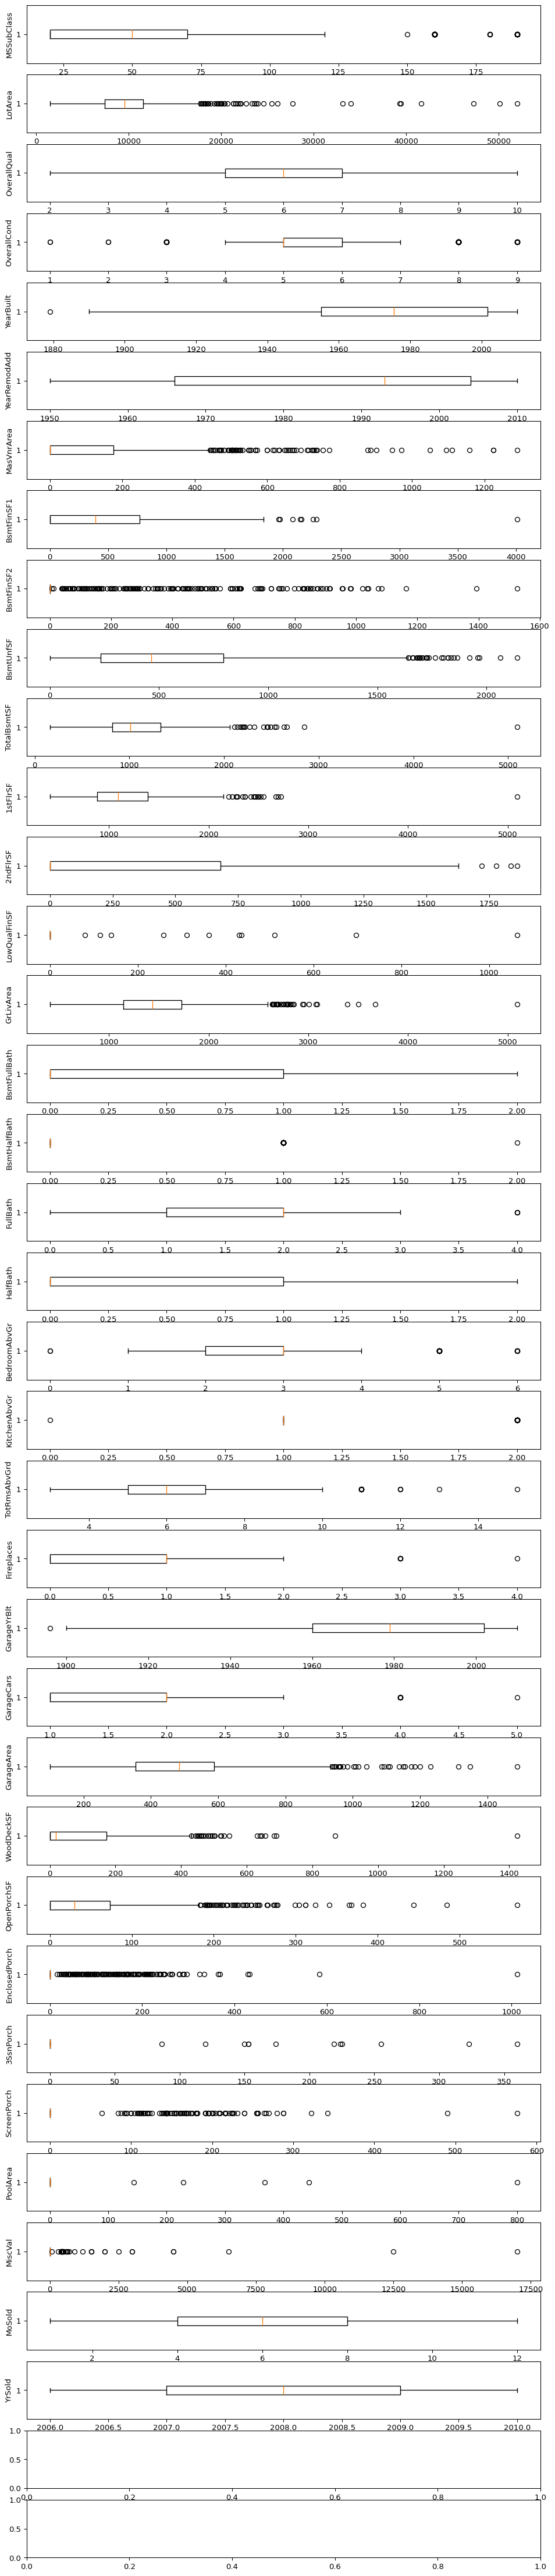

In [23]:
def show_outliers():
    fig, axs = plt.subplots(37, 1, dpi=95, figsize=(12, 60))
    i = 0
    for col in new_data.columns:
        if new_data[col].dtype != 'object':
            axs[i].boxplot(new_data[col], vert=False)
            axs[i].set_ylabel(col)
            i += 1
    plt.show()

show_outliers()

In [24]:
data_no_outliers1 = new_data.drop(['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)
data_no_outliers1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1322 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1322 non-null   int64  
 1   MSZoning       1322 non-null   object 
 2   Street         1322 non-null   object 
 3   LotShape       1322 non-null   object 
 4   LandContour    1322 non-null   object 
 5   Utilities      1322 non-null   object 
 6   LotConfig      1322 non-null   object 
 7   LandSlope      1322 non-null   object 
 8   BldgType       1322 non-null   object 
 9   OverallQual    1322 non-null   int64  
 10  OverallCond    1322 non-null   int64  
 11  YearBuilt      1322 non-null   int64  
 12  YearRemodAdd   1322 non-null   int64  
 13  RoofStyle      1322 non-null   object 
 14  MasVnrArea     1322 non-null   float64
 15  ExterQual      1322 non-null   object 
 16  ExterCond      1322 non-null   object 
 17  Foundation     1322 non-null   object 
 18  BsmtQual     

In [25]:
new_data = data_no_outliers1

In [26]:
# def remove_outliers():
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        continue
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    new_data = new_data[(new_data[col] >= lower_bound) & (new_data[col] <= upper_bound)]
    
# remove_outliers()
print(new_data.shape)

(898, 53)


In [27]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,898.0,48.830735,31.228511,20.0,20.00,50.0,60.00,120.0
OverallQual,898.0,6.047884,1.259497,2.0,5.00,6.0,7.00,10.0
OverallCond,898.0,5.506682,0.773343,4.0,5.00,5.0,6.00,7.0
YearBuilt,898.0,1973.778396,27.970420,1890.0,1955.00,1975.0,2001.00,2010.0
YearRemodAdd,898.0,1982.844098,21.138820,1950.0,1962.00,1991.0,2003.00,2010.0
MasVnrArea,898.0,67.958797,106.229624,0.0,0.00,0.0,130.00,450.0
BsmtFinSF1,898.0,434.316258,397.519009,0.0,0.00,379.0,741.00,1682.0
BsmtUnfSF,898.0,563.451002,410.373241,0.0,240.00,476.0,816.00,1694.0
TotalBsmtSF,898.0,1055.250557,319.800866,297.0,845.00,1008.0,1265.75,1994.0
1stFlrSF,898.0,1124.036748,301.804413,407.0,889.50,1064.5,1337.00,2046.0


In [28]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 898 entries, 0 to 1458
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     898 non-null    int64  
 1   MSZoning       898 non-null    object 
 2   Street         898 non-null    object 
 3   LotShape       898 non-null    object 
 4   LandContour    898 non-null    object 
 5   Utilities      898 non-null    object 
 6   LotConfig      898 non-null    object 
 7   LandSlope      898 non-null    object 
 8   BldgType       898 non-null    object 
 9   OverallQual    898 non-null    int64  
 10  OverallCond    898 non-null    int64  
 11  YearBuilt      898 non-null    int64  
 12  YearRemodAdd   898 non-null    int64  
 13  RoofStyle      898 non-null    object 
 14  MasVnrArea     898 non-null    float64
 15  ExterQual      898 non-null    object 
 16  ExterCond      898 non-null    object 
 17  Foundation     898 non-null    object 
 18  BsmtQual      

In [29]:
for col in new_data.columns:
    print(new_data[col].value_counts())

MSSubClass
20     372
60     187
50      99
120     83
80      46
30      39
70      30
85      20
90      13
45       6
75       2
40       1
Name: count, dtype: int64
MSZoning
RL         741
RM         116
FV          32
RH           7
C (all)      2
Name: count, dtype: int64
Street
Pave    895
Grvl      3
Name: count, dtype: int64
LotShape
Reg    553
IR1    313
IR2     30
IR3      2
Name: count, dtype: int64
LandContour
Lvl    815
HLS     39
Bnk     32
Low     12
Name: count, dtype: int64
Utilities
AllPub    898
Name: count, dtype: int64
LotConfig
Inside     672
Corner     146
CulDSac     52
FR2         24
FR3          4
Name: count, dtype: int64
LandSlope
Gtl    857
Mod     40
Sev      1
Name: count, dtype: int64
BldgType
1Fam      804
TwnhsE     71
Duplex     13
Twnhs      10
Name: count, dtype: int64
OverallQual
5     294
6     224
7     194
8     101
4      52
9      22
3       7
2       2
10      2
Name: count, dtype: int64
OverallCond
5    536
6    206
7    135
4     21
Name: 

In [30]:
data = new_data.drop(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 898 entries, 0 to 1458
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    898 non-null    int64  
 1   LotShape      898 non-null    object 
 2   OverallQual   898 non-null    int64  
 3   OverallCond   898 non-null    int64  
 4   YearBuilt     898 non-null    int64  
 5   YearRemodAdd  898 non-null    int64  
 6   ExterQual     898 non-null    object 
 7   Foundation    898 non-null    object 
 8   BsmtQual      898 non-null    object 
 9   BsmtFinType1  898 non-null    object 
 10  BsmtFinSF1    898 non-null    float64
 11  BsmtUnfSF     898 non-null    float64
 12  TotalBsmtSF   898 non-null    float64
 13  HeatingQC     898 non-null    object 
 14  1stFlrSF      898 non-null    int64  
 15  GrLivArea     898 non-null    int64  
 16  BsmtFullBath  898 non-null    float64
 17  FullBath      898 non-null    int64  
 18  HalfBath      898 non-null    int6

In [45]:
data = data.drop(['GarageYrBlt'], axis=1)

In [46]:
data.head(20)

,MSSubClass,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtQual,BsmtFinType1,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,MoSold,YrSold
0,20,3,5,6,1961,1961,3.0,1,3.0,4,...,2,3.0,5,0,1,2,1.0,730.0,6,2010
1,20,0,6,6,1958,1958,3.0,1,3.0,0,...,3,2.0,6,0,1,2,1.0,312.0,6,2010
2,60,0,5,5,1997,1998,3.0,2,2.0,2,...,3,3.0,6,1,1,0,2.0,482.0,3,2010
3,60,0,6,6,1998,1998,3.0,2,3.0,2,...,3,2.0,7,1,1,0,2.0,470.0,6,2010
4,120,0,8,5,1992,1992,2.0,2,2.0,0,...,2,2.0,5,0,1,1,2.0,506.0,1,2010
5,60,0,6,5,1993,1994,3.0,2,2.0,5,...,3,3.0,7,1,1,0,2.0,440.0,4,2010
7,60,0,6,5,1998,1998,3.0,2,2.0,5,...,3,3.0,7,1,1,0,2.0,393.0,5,2010
8,20,3,7,5,1990,1990,3.0,2,2.0,2,...,2,2.0,5,1,1,2,2.0,506.0,2,2010
9,20,3,4,5,1970,1970,3.0,1,3.0,0,...,2,3.0,4,0,1,0,2.0,525.0,4,2010
10,120,0,7,5,1999,1999,2.0,2,2.0,2,...,2,2.0,5,1,1,0,2.0,511.0,6,2010


In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,898.0,48.830735,31.228511,20.0,20.000000,50.000000,60.000000,120.0
LotShape,898.0,1.885301,1.425671,0.0,0.000000,3.000000,3.000000,3.0
OverallQual,898.0,6.047884,1.259497,2.0,5.000000,6.000000,7.000000,10.0
OverallCond,898.0,5.506682,0.773343,4.0,5.000000,5.000000,6.000000,7.0
YearBuilt,898.0,1973.778396,27.970420,1890.0,1955.000000,1975.000000,2001.000000,2010.0
YearRemodAdd,898.0,1982.844098,21.138820,1950.0,1962.000000,1991.000000,2003.000000,2010.0
ExterQual,898.0,2.582405,0.617834,0.0,2.000000,3.000000,3.000000,3.0
Foundation,898.0,1.358575,0.671559,0.0,1.000000,1.000000,2.000000,3.0
BsmtQual,898.0,2.312918,0.795101,0.0,2.000000,2.000000,3.000000,3.0
BsmtFinType1,898.0,2.698218,1.782867,0.0,1.250000,2.000000,5.000000,5.0


In [48]:
dic = {}
for col in data.columns:
    if data[col].dtype == 'object':
        dic[col] = list(data[col].unique())

dic

{}

In [49]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

ordinal_cols = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']
label_cols = ['LotShape', 'Foundation', 'BsmtFinType1', 'GarageType', 'GarageFinish']

for col in ordinal_cols:
    grades = list(data[col].unique())
    encoder = OrdinalEncoder()
    data[col] = encoder.fit_transform(data[[col]])

for col in label_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

print(data['ExterQual'])
print(data['LotShape'])

0       3.0
1       3.0
2       3.0
3       3.0
4       2.0
       ... 
1440    3.0
1442    2.0
1447    3.0
1451    3.0
1458    3.0
Name: ExterQual, Length: 898, dtype: float64
0       3
1       0
2       0
3       0
4       0
       ..
1440    0
1442    3
1447    0
1451    3
1458    3
Name: LotShape, Length: 898, dtype: int64


In [50]:
data.sample(20)

,MSSubClass,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtQual,BsmtFinType1,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,MoSold,YrSold
1061,60,3,7,5,2000,2000,2.0,2,2.0,2,...,3,2.0,7,1,1,0,2.0,486.0,7,2007
341,50,3,6,7,1948,1994,3.0,1,3.0,3,...,3,3.0,6,0,5,2,2.0,576.0,8,2009
436,50,3,5,4,1938,1950,3.0,2,3.0,3,...,3,3.0,7,2,2,2,1.0,250.0,7,2009
1098,30,3,5,5,1926,1950,3.0,2,3.0,1,...,3,3.0,6,0,5,2,1.0,352.0,4,2007
21,120,0,8,5,2006,2006,2.0,2,2.0,2,...,2,2.0,6,1,1,1,2.0,484.0,4,2010
160,60,3,5,5,1991,1991,3.0,2,2.0,4,...,3,3.0,6,0,5,2,2.0,576.0,3,2010
72,20,3,5,7,1957,1957,3.0,1,3.0,1,...,3,2.0,6,0,5,2,2.0,551.0,6,2010
1377,20,3,5,6,1996,1996,3.0,2,2.0,5,...,3,3.0,5,0,1,1,2.0,462.0,6,2006
1426,30,3,5,6,1942,1950,3.0,1,3.0,4,...,2,3.0,5,0,5,2,1.0,215.0,8,2006
856,20,0,6,5,2005,2005,3.0,2,2.0,2,...,3,2.0,6,0,1,0,2.0,388.0,6,2007


In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,898.0,48.830735,31.228511,20.0,20.000000,50.000000,60.000000,120.0
LotShape,898.0,1.885301,1.425671,0.0,0.000000,3.000000,3.000000,3.0
OverallQual,898.0,6.047884,1.259497,2.0,5.000000,6.000000,7.000000,10.0
OverallCond,898.0,5.506682,0.773343,4.0,5.000000,5.000000,6.000000,7.0
YearBuilt,898.0,1973.778396,27.970420,1890.0,1955.000000,1975.000000,2001.000000,2010.0
YearRemodAdd,898.0,1982.844098,21.138820,1950.0,1962.000000,1991.000000,2003.000000,2010.0
ExterQual,898.0,2.582405,0.617834,0.0,2.000000,3.000000,3.000000,3.0
Foundation,898.0,1.358575,0.671559,0.0,1.000000,1.000000,2.000000,3.0
BsmtQual,898.0,2.312918,0.795101,0.0,2.000000,2.000000,3.000000,3.0
BsmtFinType1,898.0,2.698218,1.782867,0.0,1.250000,2.000000,5.000000,5.0


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaling_cols = ['BsmtFinSF1', 'BsmtUnfSF']

scaler = MinMaxScaler(feature_range=(500, 1000))

for col in scaling_cols:
    data[col] = scaler.fit_transform(data[[col]])

data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,898.0,48.830735,31.228511,20.0,20.000000,50.000000,60.000000,120.0
LotShape,898.0,1.885301,1.425671,0.0,0.000000,3.000000,3.000000,3.0
OverallQual,898.0,6.047884,1.259497,2.0,5.000000,6.000000,7.000000,10.0
OverallCond,898.0,5.506682,0.773343,4.0,5.000000,5.000000,6.000000,7.0
YearBuilt,898.0,1973.778396,27.970420,1890.0,1955.000000,1975.000000,2001.000000,2010.0
YearRemodAdd,898.0,1982.844098,21.138820,1950.0,1962.000000,1991.000000,2003.000000,2010.0
ExterQual,898.0,2.582405,0.617834,0.0,2.000000,3.000000,3.000000,3.0
Foundation,898.0,1.358575,0.671559,0.0,1.000000,1.000000,2.000000,3.0
BsmtQual,898.0,2.312918,0.795101,0.0,2.000000,2.000000,3.000000,3.0
BsmtFinType1,898.0,2.698218,1.782867,0.0,1.250000,2.000000,5.000000,5.0


In [53]:
data.shape

(898, 29)

In [54]:
data.columns

Index(['MSSubClass', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold'],
      dtype='object')

In [55]:
data.to_csv('cleaned_test_data.csv', index=False)

In [56]:
data.head(10)

,MSSubClass,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtQual,BsmtFinType1,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,MoSold,YrSold
0,20,3,5,6,1961,1961,3.0,1,3.0,4,...,2,3.0,5,0,1,2,1.0,730.0,6,2010
1,20,0,6,6,1958,1958,3.0,1,3.0,0,...,3,2.0,6,0,1,2,1.0,312.0,6,2010
2,60,0,5,5,1997,1998,3.0,2,2.0,2,...,3,3.0,6,1,1,0,2.0,482.0,3,2010
3,60,0,6,6,1998,1998,3.0,2,3.0,2,...,3,2.0,7,1,1,0,2.0,470.0,6,2010
4,120,0,8,5,1992,1992,2.0,2,2.0,0,...,2,2.0,5,0,1,1,2.0,506.0,1,2010
5,60,0,6,5,1993,1994,3.0,2,2.0,5,...,3,3.0,7,1,1,0,2.0,440.0,4,2010
7,60,0,6,5,1998,1998,3.0,2,2.0,5,...,3,3.0,7,1,1,0,2.0,393.0,5,2010
8,20,3,7,5,1990,1990,3.0,2,2.0,2,...,2,2.0,5,1,1,2,2.0,506.0,2,2010
9,20,3,4,5,1970,1970,3.0,1,3.0,0,...,2,3.0,4,0,1,0,2.0,525.0,4,2010
10,120,0,7,5,1999,1999,2.0,2,2.0,2,...,2,2.0,5,1,1,0,2.0,511.0,6,2010
